## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

#### Table flights_test
This table consists of subset of columns from table flights. It represents flights from January 2020 which will be used for evaluation. Therefore, we are missing some features that we are not suppossed to know before the flight lands.

##### Variables:

__fl_date__: Flight Date (yyyy-mm-dd)  
__mkt_unique_carrier__: Unique Marketing Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.  
__branded_code_share__: Reporting Carrier Operated or Branded Code Share Partners  
__mkt_carrier__: Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code.  
__mkt_carrier_fl_num__: Flight Number  
__op_unique_carrier__: Unique Scheduled Operating Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users,for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.  
__tail_num__: Tail Number  
__op_carrier_fl_num__: Flight Number  
__origin_airport_id__: Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.  
__origin__: Origin Airport  
__origin_city_name__: Origin Airport, City Name  
__dest_airport_id__: Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.  
__dest__: Destination Airport  
__dest_city_name__: Destination Airport, City Name  
__crs_dep_time__: CRS Departure Time (local time: hhmm)  
__crs_arr_time__: CRS Arrival Time (local time: hhmm)  
__dup__: Duplicate flag marked Y if the flight is swapped based on Form-3A data  
__crs_elapsed_time__: CRS Elapsed Time of Flight, in Minutes  
__flights__: Number of Flights  
__distance__: Distance between airports (miles)  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections

In [2]:
df = pd.read_csv('data/train_data_raw.csv')

In [3]:
df.shape

(300000, 41)

In [4]:
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2019-01-07,DL,DL,DL,2185,DL,N378DA,2185,10721,BOS,...,1.0,1124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-27,WN,WN,WN,5073,WN,N8719Q,5073,15304,TPA,...,1.0,1788.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-27,AA,AA,AA,1684,AA,N702UW,1684,14100,PHL,...,1.0,666.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-28,UA,UA_CODESHARE,UA,3592,YX,N642RW,3592,13296,MHT,...,1.0,209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-10,DL,DL,DL,1486,DL,N593NW,1486,14869,SLC,...,1.0,1931.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              300000 non-null  object 
 1   mkt_unique_carrier   300000 non-null  object 
 2   branded_code_share   300000 non-null  object 
 3   mkt_carrier          300000 non-null  object 
 4   mkt_carrier_fl_num   300000 non-null  int64  
 5   op_unique_carrier    300000 non-null  object 
 6   tail_num             298910 non-null  object 
 7   op_carrier_fl_num    300000 non-null  int64  
 8   origin_airport_id    300000 non-null  int64  
 9   origin               300000 non-null  object 
 10  origin_city_name     300000 non-null  object 
 11  dest_airport_id      300000 non-null  int64  
 12  dest                 300000 non-null  object 
 13  dest_city_name       300000 non-null  object 
 14  crs_dep_time         300000 non-null  int64  
 15  dep_time         

In [6]:
df['origin'].nunique()

373

In [7]:
df['origin_airport_id'].nunique()

373

In [8]:
df['origin_city_name'].nunique()

365

In [9]:
df[['origin', 'origin_airport_id', 'origin_city_name']]

,origin,origin_airport_id,origin_city_name
0,BOS,10721,"Boston, MA"
1,TPA,15304,"Tampa, FL"
2,PHL,14100,"Philadelphia, PA"
3,MHT,13296,"Manchester, NH"
4,SLC,14869,"Salt Lake City, UT"
...,...,...,...
299995,LAX,12892,"Los Angeles, CA"
299996,PHX,14107,"Phoenix, AZ"
299997,CLT,11057,"Charlotte, NC"
299998,CWA,11203,"Mosinee, WI"


In [11]:
df['fl_date'] = pd.to_datetime(df['fl_date'])

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [12]:
df['month'] = df['fl_date'].dt.month

In [13]:
df['month'].nunique()

12

<Figure size 1080x576 with 0 Axes>

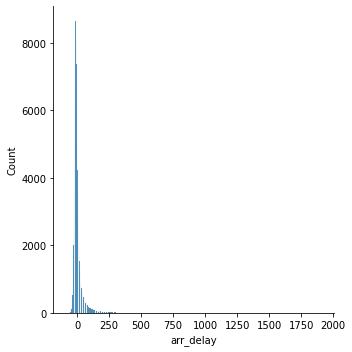

In [15]:
plt.figure(figsize=[15,8])
sns.displot(x= df['arr_delay'])

In [16]:
df['arr_delay'].describe()

count    293446.000000
mean          5.692645
std          52.461702
min         -86.000000
25%         -15.000000
50%          -6.000000
75%           8.000000
max        1910.000000
Name: arr_delay, dtype: float64

- Arr_delay does not follow normal distribution

In [17]:
df[df['arr_delay'] > 90][['month','arr_delay', 'carrier_delay', 'weather_delay',
                           'nas_delay','security_delay', 'late_aircraft_delay']].groupby('month').agg(['mean', 'median', 'sum'])

arr_delay                  carrier_delay                  \
             mean median       sum          mean median      sum   
month                                                              
1      190.375746  144.0  191518.0     55.319085    0.0  55651.0   
2      192.148180  142.0  226927.0     66.944115    0.0  79061.0   
3      181.686250  135.0  145349.0     72.798750    3.0  58239.0   
4      180.431934  136.0  176282.0     58.675537    2.0  57326.0   
5      176.989593  137.0  187078.0     50.650899    1.0  53538.0   
6      176.760931  142.5  250647.0     50.772214    1.0  71995.0   
7      187.330941  142.0  234913.0     57.251994    1.0  71794.0   
8      184.874463  139.0  215009.0     57.705073    0.0  67111.0   
9      193.390013  138.0  143302.0     76.408907    1.0  56619.0   
10     174.526976  135.0  139098.0     69.718946    5.0  55566.0   
11     194.568369  136.0  118103.0     73.385502    2.0  44545.0   
12     189.408759  143.5  207592.0     59.770985    1.0  65509.0   

      weather_delay                  nas_delay                 security_delay  \
               mean median      sum       mean median      sum           mean   
month                                                                           
1         19.294235    0.0  19410.0  39.561630    2.0  39799.0       0.203777   
2         16.181202    0.0  19110.0  35.739204    3.0  42208.0       0.115157   
3         11.907500    0.0   9526.0  24.843750    0.0  19875.0       0.000000   
4         13.950870    0.0  13630.0  35.562948    0.0  34745.0       0.009212   
5         15.305582    0.0  16178.0  34.773888    1.0  36756.0       0.028382   
6         11.469676    0.0  16264.0  34.488011    2.0  48904.0       0.000000   
7         14.527113    0.0  18217.0  36.688995    0.0  46008.0       0.200159   
8         13.411866    0.0  15598.0  40.081685    1.0  46615.0       0.036973   
9         12.326586    0.0   9134.0  37.269906    0.0  27617.0       0.000000   
10         7.196989    0.0   5736.0  29.229611    0.0  23296.0       0.010038   
11        11.927512    0.0   7240.0  25.080725    0.0  15224.0       0.151565   
12         8.962591    0.0   9823.0  34.538321    0.0  37854.0       0.147810   

                    late_aircraft_delay                   
      median    sum                mean median       sum  
month                                                     
1        0.0  205.0           75.997018   49.5   76453.0  
2        0.0  136.0           73.168501   49.0   86412.0  
3        0.0    0.0           72.136250   44.5   57709.0  
4        0.0    9.0           72.233367   51.0   70572.0  
5        0.0   30.0           76.230842   66.0   80576.0  
6        0.0    0.0           80.031030   71.0  113484.0  
7        0.0  251.0           78.662679   54.5   98643.0  
8        0.0   43.0           73.638865   36.0   85642.0  
9        0.0    0.0           67.384615   12.0   49932.0  
10       0.0    8.0           68.371393   36.0   54492.0  
11       0.0   92.0           84.023064   77.0   51002.0  
12       0.0  162.0           85.989051   80.5   94244.0

In [21]:
df[df['arr_delay'] > 90].shape

(12097, 42)

In [22]:
df_new = df[df['arr_delay'] < 90]

c:\users\nqhuy\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

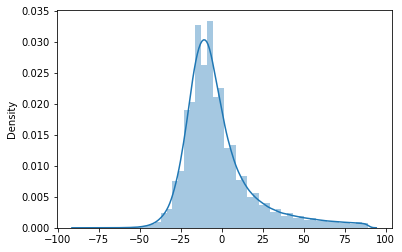

In [23]:
sns.distplot(x= df_new['arr_delay'])

In [24]:
df_new['arr_delay'].describe()

count    281165.000000
mean         -2.069582
std          21.724492
min         -86.000000
25%         -15.000000
50%          -7.000000
75%           5.000000
max          89.000000
Name: arr_delay, dtype: float64

<AxesSubplot:xlabel='month'>

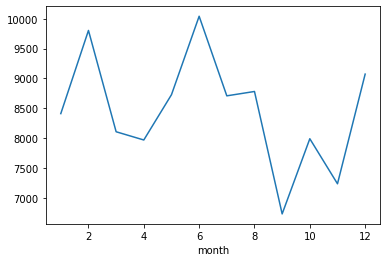

In [80]:
df[df['arr_delay'] > 0].groupby('month')['arr_delay'].count().plot()

__- Number of delayed flight high in Feb, June and Dec__

<AxesSubplot:xlabel='month'>

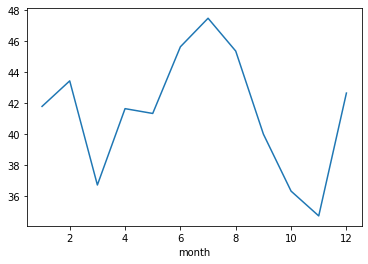

In [81]:
df[df['arr_delay'] > 0].groupby('month')['arr_delay'].mean().plot()

__- Average in delayed also high in Feb, June-Aug and Dec --> Holiday season__

<AxesSubplot:xlabel='month'>

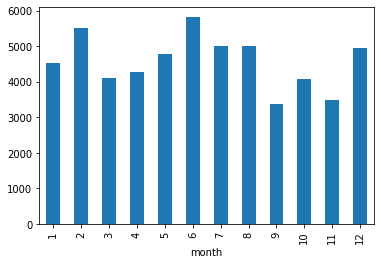

In [29]:
df[df['arr_delay'] > 15].groupby('month')['arr_delay'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='dep_delay', ylabel='arr_delay'>

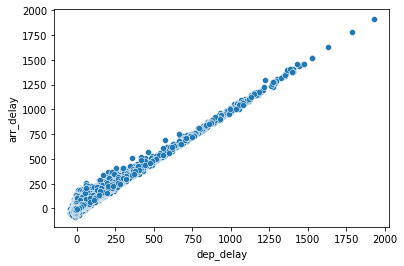

In [83]:
sns.scatterplot(data=df, x = 'dep_delay', y= 'arr_delay')

__- very high correlation between dep_delay and arr_delay__  
=> Thinking of create feature related to dep_delay ???

In [88]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'month', 'flight_type', 'dep_hour'],
      dtype='object')

In [89]:
df_new = df.drop(columns=['mkt_carrier_fl_num', 'op_carrier_fl_num', 'origin_airport_id',
                         'dest_airport_id', 'cancelled', 'cancellation_code', 
                         'diverted', 'dup', 'flights'])

<AxesSubplot:>

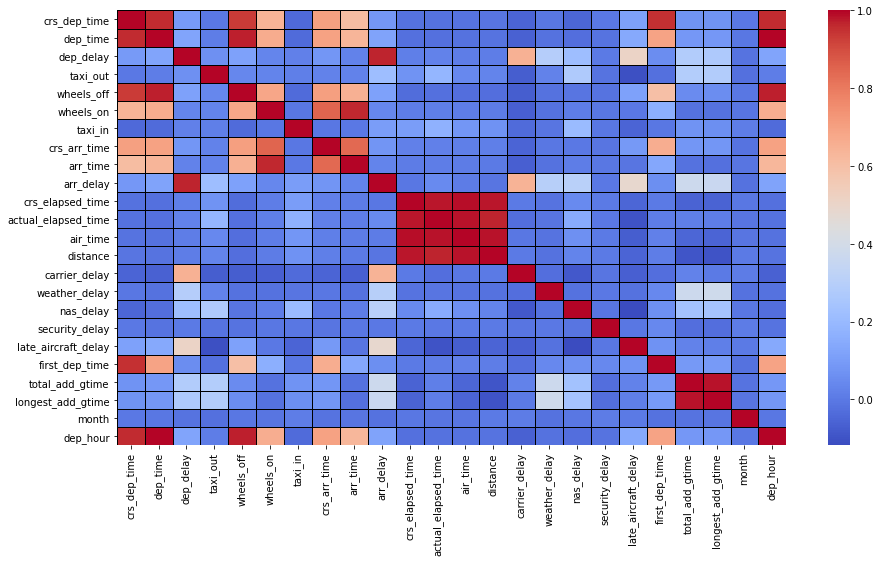

In [93]:
plt.figure(figsize=(15,8))
sns.heatmap(df_new.select_dtypes(exclude='object').corr(), cmap='coolwarm', linecolor='k', linewidths=1)

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [30]:
df.groupby('month')['arr_delay'].agg(['min', 'max', 'mean', 'median', 'count'])

,min,max,mean,median,count
month,,,,,
1,-75.0,1407.0,5.176911,-7.0,24193
2,-76.0,1394.0,9.497241,-4.0,24107
3,-63.0,1407.0,3.372609,-7.0,24468
4,-63.0,1268.0,4.608039,-7.0,24357
5,-59.0,1265.0,6.472014,-6.0,24387
6,-61.0,1458.0,11.575727,-4.0,24397
7,-75.0,1521.0,8.757173,-6.0,24396
8,-60.0,1299.0,8.018593,-6.0,24472
9,-55.0,1523.0,1.033798,-9.0,24528


__Same conclusion__

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [31]:
# 33% of flights was departure delayed
df[df.dep_delay>0].shape[0]/df.shape[0]

0.33411

In [32]:
# 24% of flight are arrival delays caused by departure delays
df[(df.dep_delay>0) & (df.arr_delay>0)].shape[0]/df.shape[0]

0.24282

In [33]:
# 9% of flight are delayed in departure but arrive ontime or early
df[(df.dep_delay>0) & (df.arr_delay<=0)].shape[0]/df.shape[0]

0.08960666666666667

#### **Task 6**: How many states cover 50% of US air traffic? 

In [34]:
df.origin_city_name.head()

0            Boston, MA
1             Tampa, FL
2      Philadelphia, PA
3        Manchester, NH
4    Salt Lake City, UT
Name: origin_city_name, dtype: object

In [45]:
# state in origin airport (last 2 letters)
origin_state= df.origin_city_name.str.split(pat=", ",expand=True).iloc[:,1].tolist()
len(origin_state)

300000

In [39]:
df.dest_city_name.head()

0    Minneapolis, MN
1        Phoenix, AZ
2        Atlanta, GA
3         Newark, NJ
4        Orlando, FL
Name: dest_city_name, dtype: object

In [46]:
# state in destination airport, last 2 letters
destination_state= df.dest_city_name.str.split(pat=", ",expand=True).iloc[:,1].tolist()

In [61]:
air_traffic= origin_state + destination_state
len(air_traffic)

600000

In [62]:
result= dict(collections.Counter(air_traffic))
result

{'MA': 11603,
 'FL': 43985,
 'PA': 18067,
 'NH': 859,
 'UT': 9315,
 'LA': 6450,
 'MS': 1195,
 'IN': 5489,
 'TN': 11022,
 'MO': 11094,
 'NY': 30570,
 'TX': 59753,
 'IL': 37620,
 'CA': 64538,
 'GA': 31640,
 'AK': 3107,
 'PR': 2265,
 'CO': 23904,
 'NC': 28210,
 'OH': 13403,
 'MI': 16833,
 'NE': 2564,
 'AZ': 15620,
 'WV': 625,
 'NJ': 12245,
 'AR': 2563,
 'ME': 1548,
 'NV': 14204,
 'DC': 17610,
 'WA': 17540,
 'WI': 5204,
 'ND': 1620,
 'SC': 5393,
 'MD': 7960,
 'VA': 5962,
 'HI': 9323,
 'OK': 3523,
 'IA': 2446,
 'VI': 357,
 'MN': 12535,
 'OR': 8467,
 'ID': 2469,
 'KS': 1269,
 'AL': 3530,
 'KY': 3146,
 'RI': 1436,
 'NM': 2283,
 'CT': 2298,
 'MT': 2276,
 'SD': 1267,
 'VT': 909,
 'WY': 774,
 'TT': 112}

In [63]:
result= pd.Series(result,index=result.keys()).reset_index()
result.head()

,index,0
0,MA,11603
1,FL,43985
2,PA,18067
3,NH,859
4,UT,9315


In [64]:
# change column name and calculate percentage
result.columns=['State','nbr_flights']
result['percentage']= (result.nbr_flights/600000*100).round(2)

In [65]:
result.shape
# there are 53 states with flight operation

(53, 3)

In [66]:
result.sort_values(by='percentage', ascending=False).head(5)
# 2 States cover 50% of US air traffic

,State,nbr_flights,percentage
13,CA,64538,10.76
11,TX,59753,9.96
1,FL,43985,7.33
12,IL,37620,6.27
14,GA,31640,5.27


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [67]:
df.air_time.describe().round(0)

count    293446.0
mean        108.0
std          69.0
min           8.0
25%          58.0
50%          89.0
75%         137.0
max         671.0
Name: air_time, dtype: float64

In [68]:
# classified type of flight based on flight duration
df['flight_type']= np.where(df.air_time <180, "SHORT", np.where(df.air_time<360,"MEDIUM","LONG"))

In [69]:
df[['air_time','flight_type','dep_time']].head()

,air_time,flight_type,dep_time
0,177.0,SHORT,1622.0
1,251.0,MEDIUM,1658.0
2,109.0,SHORT,1229.0
3,54.0,SHORT,1118.0
4,208.0,MEDIUM,1729.0


In [70]:
df.flight_type.value_counts()
# majority of flight are short_haul

SHORT     254570
MEDIUM     37733
LONG        7697
Name: flight_type, dtype: int64

In [71]:
# take hour of departure
df['dep_hour']= np.floor(df.dep_time/100)

In [72]:
df[['flight_type','dep_time','dep_hour']].head(10)

,flight_type,dep_time,dep_hour
0,SHORT,1622.0,16.0
1,MEDIUM,1658.0,16.0
2,SHORT,1229.0,12.0
3,SHORT,1118.0,11.0
4,MEDIUM,1729.0,17.0
5,SHORT,1546.0,15.0
6,SHORT,1753.0,17.0
7,SHORT,1037.0,10.0
8,SHORT,714.0,7.0
9,SHORT,2115.0,21.0


In [73]:
# for each flight type, count number of flight by dep_hour
take_off_hour= df.groupby(['flight_type','dep_hour']).fl_date.count().reset_index()
take_off_hour.columns=['flight_type',"dep_hour","nbr_flight"]

In [74]:
take_off_hour.head()

,flight_type,dep_hour,nbr_flight
0,LONG,0.0,6
1,LONG,1.0,8
2,LONG,3.0,1
3,LONG,4.0,1
4,LONG,5.0,36


In [64]:
take_off_hour[take_off_hour.flight_type =="SHORT"].sort_values('nbr_flight',ascending=False)
# short-haul flight are take off in the afternoon 

,flight_type,dep_hour,nbr_flight
58,SHORT,17.0,640
48,SHORT,7.0,634
52,SHORT,11.0,631
55,SHORT,14.0,623
56,SHORT,15.0,622
54,SHORT,13.0,618
59,SHORT,18.0,617
53,SHORT,12.0,617
47,SHORT,6.0,616
49,SHORT,8.0,594


In [75]:
take_off_hour[take_off_hour.flight_type =="MEDIUM"].sort_values('nbr_flight',ascending=False)
# Medium flight often take off in the morning

,flight_type,dep_hour,nbr_flight
30,MEDIUM,7.0,2903
31,MEDIUM,8.0,2823
29,MEDIUM,6.0,2695
40,MEDIUM,17.0,2336
32,MEDIUM,9.0,2164
33,MEDIUM,10.0,2122
35,MEDIUM,12.0,2080
34,MEDIUM,11.0,2052
37,MEDIUM,14.0,1935
38,MEDIUM,15.0,1932


In [66]:
take_off_hour[take_off_hour.flight_type =="LONG"].sort_values('nbr_flight',ascending=False)
# Medium flight often take off in the morning

,flight_type,dep_hour,nbr_flight
10,LONG,17.0,7
2,LONG,7.0,6
9,LONG,15.0,6
5,LONG,10.0,5
6,LONG,11.0,5
11,LONG,18.0,5
12,LONG,19.0,4
13,LONG,20.0,3
1,LONG,6.0,2
4,LONG,9.0,2


#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?